# Import Package and Upload Data


In [1]:
#let us start by importing the relevant libraries
%matplotlib inline
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_auc_score
from scipy.stats import zscore
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('C:\\Users\\admin\\Downloads\\HR_Analytics.csv')


In [3]:
df

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,RM412,60,55+,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,...,4,80,0,33,5,1,29,8,11,10.0
1476,RM428,60,55+,No,Travel_Frequently,1499,Sales,28,3,Marketing,...,4,80,0,22,5,4,18,13,13,11.0
1477,RM537,60,55+,No,Travel_Rarely,1179,Sales,16,4,Marketing,...,4,80,0,10,1,3,2,2,2,2.0
1478,RM880,60,55+,No,Travel_Rarely,696,Sales,7,4,Marketing,...,2,80,1,12,3,3,11,7,1,9.0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

In [5]:
np.unique(df['AgeGroup'])


array(['18-25', '26-35', '36-45', '46-55', '55+'], dtype=object)

In [6]:
np.unique(df['Attrition'])


array(['No', 'Yes'], dtype=object)

In [7]:
np.unique(df['BusinessTravel'])


array(['Non-Travel', 'TravelRarely', 'Travel_Frequently', 'Travel_Rarely'],
      dtype=object)

In [8]:
np.unique(df['Department'])


array(['Human Resources', 'Research & Development', 'Sales'], dtype=object)

In [9]:
np.unique(df['Education'])


array([1, 2, 3, 4, 5], dtype=int64)

In [10]:
np.unique(df['EducationField'])


array(['Human Resources', 'Life Sciences', 'Marketing', 'Medical',
       'Other', 'Technical Degree'], dtype=object)

In [11]:
np.unique(df['JobRole'])


array(['Healthcare Representative', 'Human Resources',
       'Laboratory Technician', 'Manager', 'Manufacturing Director',
       'Research Director', 'Research Scientist', 'Sales Executive',
       'Sales Representative'], dtype=object)

In [12]:
np.unique(df['MaritalStatus'])


array(['Divorced', 'Married', 'Single'], dtype=object)

In [13]:
np.unique(df['YearsWithCurrManager'])


array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., nan])

In [14]:
np.unique(df['SalarySlab'])


array(['10k-15k', '15k+', '5k-10k', 'Upto 5k'], dtype=object)

# Preprocessing


In [15]:
df

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,RM412,60,55+,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,...,4,80,0,33,5,1,29,8,11,10.0
1476,RM428,60,55+,No,Travel_Frequently,1499,Sales,28,3,Marketing,...,4,80,0,22,5,4,18,13,13,11.0
1477,RM537,60,55+,No,Travel_Rarely,1179,Sales,16,4,Marketing,...,4,80,0,10,1,3,2,2,2,2.0
1478,RM880,60,55+,No,Travel_Rarely,696,Sales,7,4,Marketing,...,2,80,1,12,3,3,11,7,1,9.0


In [16]:
df.isnull().sum()


EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
Training

In [17]:
df['YearsWithCurrManager'] = df['YearsWithCurrManager'].fillna(df['YearsWithCurrManager'].mean())


In [18]:
df.isnull().sum()


EmpID                       0
Age                         0
AgeGroup                    0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
SalarySlab                  0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBa

In [19]:
df.duplicated().sum()


7

In [20]:
df.drop_duplicates()


,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,RM412,60,55+,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,...,4,80,0,33,5,1,29,8,11,10.0
1476,RM428,60,55+,No,Travel_Frequently,1499,Sales,28,3,Marketing,...,4,80,0,22,5,4,18,13,13,11.0
1477,RM537,60,55+,No,Travel_Rarely,1179,Sales,16,4,Marketing,...,4,80,0,10,1,3,2,2,2,2.0
1478,RM880,60,55+,No,Travel_Rarely,696,Sales,7,4,Marketing,...,2,80,1,12,3,3,11,7,1,9.0


In [21]:
df.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace=True)


# Encoding Process


In [22]:
# Encode Attrition
df['Attrition'].replace(to_replace='No',  value=0, inplace=True)
df['Attrition'].replace(to_replace='Yes',  value=1, inplace=True)


In [23]:
# Encode Age Group 
df['AgeGroup'].replace(to_replace='18-25',  value=0, inplace=True)
df['AgeGroup'].replace(to_replace='26-35',  value=1, inplace=True)
df['AgeGroup'].replace(to_replace='36-45',  value=2, inplace=True)
df['AgeGroup'].replace(to_replace='46-55',  value=3, inplace=True)
df['AgeGroup'].replace(to_replace='55+',  value=4, inplace=True)


In [24]:
# Encode Business Travel
df['BusinessTravel'].replace(to_replace='Non-Travel',  value=0, inplace=True)
df['BusinessTravel'].replace(to_replace='Travel_Rarely',  value=1, inplace=True)
df['BusinessTravel'].replace(to_replace='TravelRarely',  value=1, inplace=True)
df['BusinessTravel'].replace(to_replace='Travel_Frequently',  value=2, inplace=True)


In [25]:
# Encode Department
df['Department'].replace(to_replace='Human Resources',  value=0, inplace=True)
df['Department'].replace(to_replace='Research & Development',  value=1, inplace=True)
df['Department'].replace(to_replace='Sales',  value=2, inplace=True)


In [26]:
# Encode Edu Field
df['EducationField'].replace(to_replace='Human Resources',  value=0, inplace=True)
df['EducationField'].replace(to_replace='Life Sciences',  value=1, inplace=True)
df['EducationField'].replace(to_replace='Marketing',  value=2, inplace=True)
df['EducationField'].replace(to_replace='Medical',  value=3, inplace=True)
df['EducationField'].replace(to_replace='Technical Degree',  value=4, inplace=True)
df['EducationField'].replace(to_replace='Other',  value=5, inplace=True)


In [27]:
# Encode Gender
df['Gender'].replace(to_replace='Female',  value=0, inplace=True)
df['Gender'].replace(to_replace='Male',  value=1, inplace=True)


In [28]:
# Encode Job Role
df['JobRole'].replace(to_replace='Healthcare Representative',  value=0, inplace=True)
df['JobRole'].replace(to_replace='Human Resources',  value=1, inplace=True)
df['JobRole'].replace(to_replace='Laboratory Technician',  value=2, inplace=True)
df['JobRole'].replace(to_replace='Manager',  value=3, inplace=True)
df['JobRole'].replace(to_replace='Manufacturing Director',  value=4, inplace=True)
df['JobRole'].replace(to_replace='Research Director',  value=5, inplace=True)
df['JobRole'].replace(to_replace='Research Scientist',  value=6, inplace=True)
df['JobRole'].replace(to_replace='Sales Executive',  value=7, inplace=True)
df['JobRole'].replace(to_replace='Sales Representative',  value=8, inplace=True)


In [29]:
# Encode Marital Status
'Divorced', 'Married', 'Single'
df['MaritalStatus'].replace(to_replace='Divorced',  value=0, inplace=True)
df['MaritalStatus'].replace(to_replace='Married',  value=1, inplace=True)
df['MaritalStatus'].replace(to_replace='Single',  value=2, inplace=True)


In [30]:
# Encode Salary Slab
df['SalarySlab'].replace(to_replace='5k-10k',  value=0, inplace=True)
df['SalarySlab'].replace(to_replace='Upto 5k',  value=1, inplace=True)
df['SalarySlab'].replace(to_replace='10k-15k',  value=2, inplace=True)
df['SalarySlab'].replace(to_replace='15k+',  value=3, inplace=True)


In [31]:
# Encode Over Time
df['OverTime'].replace(to_replace='No',  value=0, inplace=True)
df['OverTime'].replace(to_replace='Yes',  value=1, inplace=True)


In [32]:
# String to be removed
substring_to_remove = 'RM'

# Removing the substring from the 'Column1'
df['EmpID'] = df['EmpID'].str.replace(substring_to_remove, '')


In [33]:
df

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,297,18,0,1,1,230,1,3,3,1,...,3,3,0,0,2,3,0,0,0,0.0
1,302,18,0,0,1,812,2,10,3,3,...,3,1,0,0,2,3,0,0,0,0.0
2,458,18,0,1,2,1306,2,5,3,2,...,3,4,0,0,3,3,0,0,0,0.0
3,728,18,0,0,0,287,1,5,2,1,...,3,4,0,0,2,3,0,0,0,0.0
4,829,18,0,1,0,247,1,8,1,3,...,3,4,0,0,0,3,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,412,60,4,0,1,422,1,7,3,1,...,3,4,0,33,5,1,29,8,11,10.0
1476,428,60,4,0,2,1499,2,28,3,2,...,3,4,0,22,5,4,18,13,13,11.0
1477,537,60,4,0,1,1179,2,16,4,2,...,3,4,0,10,1,3,2,2,2,2.0
1478,880,60,4,0,1,696,2,7,4,2,...,3,2,1,12,3,3,11,7,1,9.0


# Oversampling


In [34]:
df['Attrition'].value_counts()


0    1242
1     238
Name: Attrition, dtype: int64

In [35]:
import numpy as np
from imblearn.over_sampling import SMOTE


In [36]:
X = df[['BusinessTravel', 'DailyRate',
        'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber', 'EnvironmentSatisfaction',
        'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
        'SalarySlab', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
        'RelationshipSatisfaction','StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
        'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
y = df['Attrition']


In [37]:
X

,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,230,1,3,3,1,405,3,1,54,...,3,3,0,0,2,3,0,0,0,0.0
1,1,812,2,10,3,3,411,4,0,69,...,3,1,0,0,2,3,0,0,0,0.0
2,2,1306,2,5,3,2,614,2,1,69,...,3,4,0,0,3,3,0,0,0,0.0
3,0,287,1,5,2,1,1012,2,1,73,...,3,4,0,0,2,3,0,0,0,0.0
4,0,247,1,8,1,3,1156,3,1,80,...,3,4,0,0,0,3,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,1,422,1,7,3,1,549,1,0,41,...,3,4,0,33,5,1,29,8,11,10.0
1476,2,1499,2,28,3,2,573,3,0,80,...,3,4,0,22,5,4,18,13,13,11.0
1477,1,1179,2,16,4,2,732,1,1,84,...,3,4,0,10,1,3,2,2,2,2.0
1478,1,696,2,7,4,2,1233,2,1,52,...,3,2,1,12,3,3,11,7,1,9.0


In [38]:
y

0       1
1       0
2       1
3       0
4       1
       ..
1475    0
1476    0
1477    0
1478    0
1479    0
Name: Attrition, Length: 1480, dtype: int64

In [39]:
smote = SMOTE(sampling_strategy={0:1242, 1:1242}, random_state=42)  # You can adjust the sampling strategy as needed
X_resampled, y_resampled = smote.fit_resample(X, y)


In [40]:
print("Original class distribution:", np.bincount(y))
print("Resampled class distribution:", np.bincount(y_resampled))


Original class distribution: [1242  238]
Resampled class distribution: [1242 1242]


In [41]:
y_resampled.value_counts()


1    1242
0    1242
Name: Attrition, dtype: int64

In [42]:
df2 = pd.concat([X_resampled, y_resampled], axis = 1)
df2


,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,1,230,1,3,3,1,405,3,1,54,...,3,0,0,2,3,0,0,0,0.000000,1
1,1,812,2,10,3,3,411,4,0,69,...,1,0,0,2,3,0,0,0,0.000000,0
2,2,1306,2,5,3,2,614,2,1,69,...,4,0,0,3,3,0,0,0,0.000000,1
3,0,287,1,5,2,1,1012,2,1,73,...,4,0,0,2,3,0,0,0,0.000000,0
4,0,247,1,8,1,3,1156,3,1,80,...,4,0,0,0,3,0,0,0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,1,573,1,3,2,3,1591,2,0,71,...,2,0,0,2,3,0,0,0,0.000000,1
2480,1,886,2,7,3,3,1310,3,0,82,...,1,0,9,2,2,5,4,2,4.759581,1
2481,1,1180,1,12,1,2,1753,3,1,85,...,1,0,6,2,3,6,4,0,3.480876,1
2482,2,378,1,19,3,1,637,1,0,92,...,3,1,5,3,3,2,1,0,1.077325,1


# Corelation Between Variable


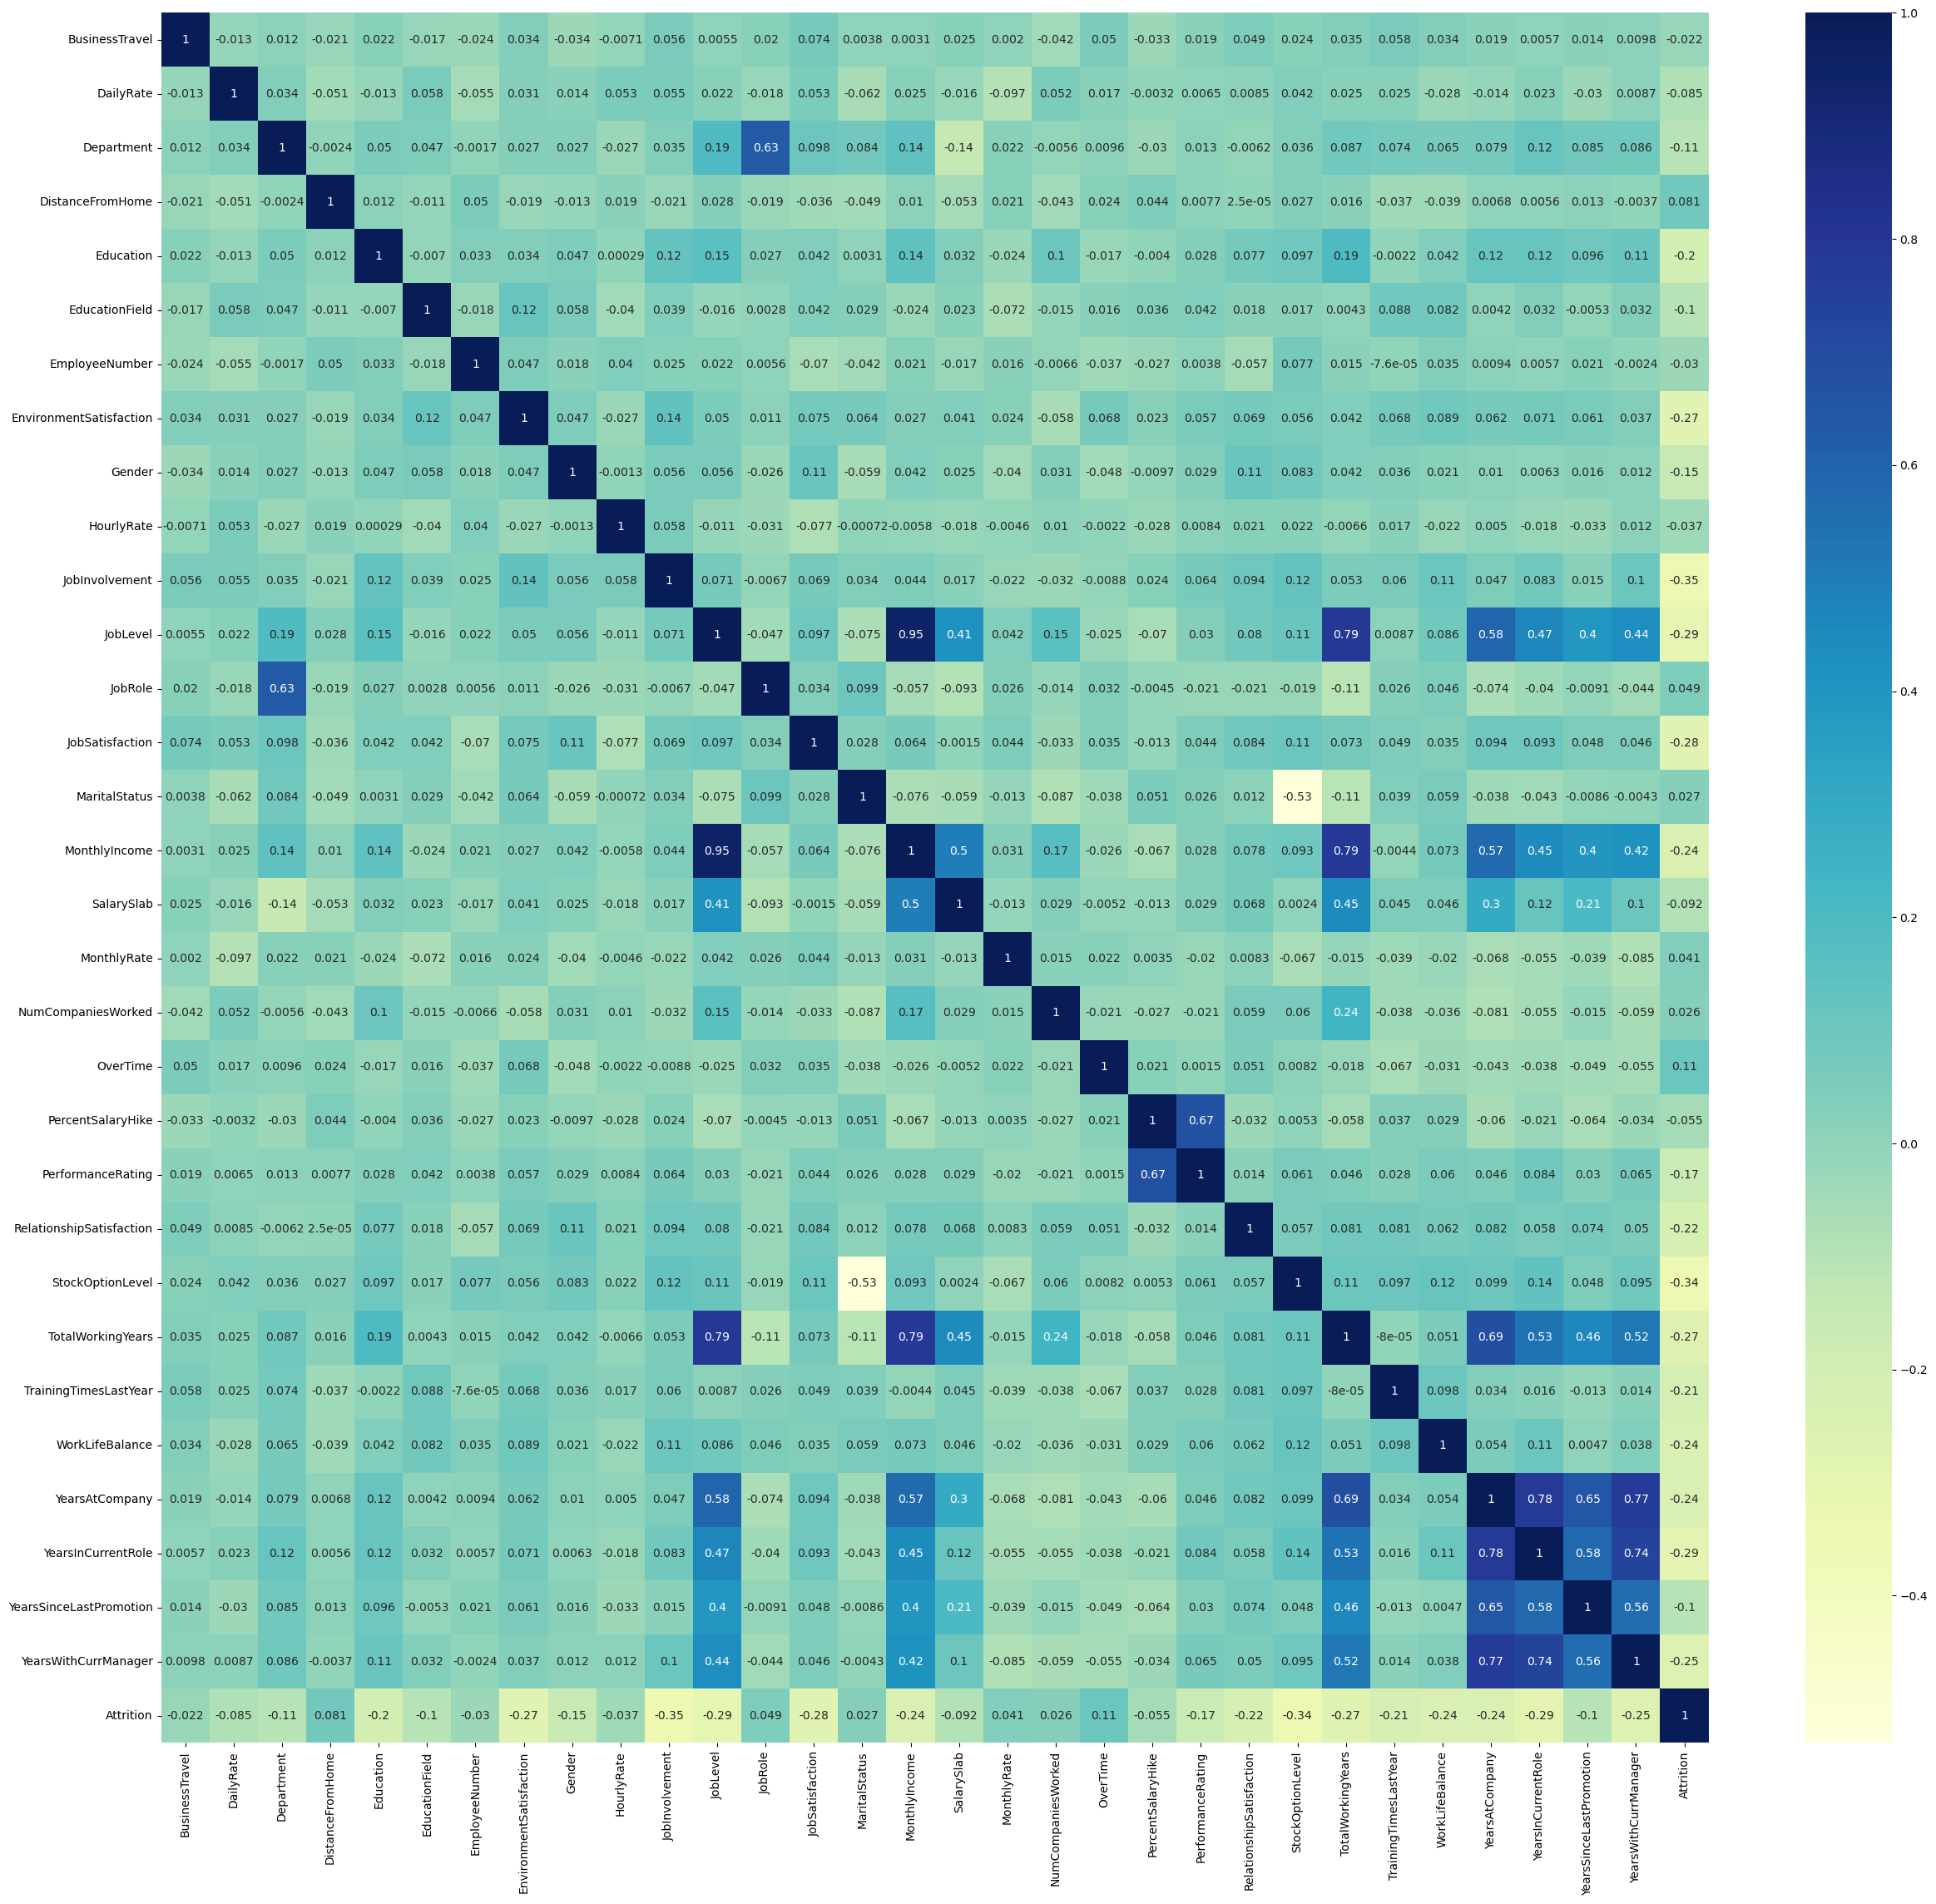

In [43]:
#Correlation before oversampling 
import matplotlib.pyplot as plt
import seaborn as sns
plt = plt.figure(figsize=(30,27))
sns.heatmap(df2.corr(), cmap="YlGnBu", annot = True)
plt.show()


# PCA Process


In [44]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [45]:
X_pca = X_resampled


In [46]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_pca)
scaled_data


array([[-0.09593528, -1.45664772, -0.37617463, ..., -1.05945166,
        -0.65190286, -1.10414952],
       [-0.09593528,  0.08689818,  1.57867429, ..., -1.05945166,
        -0.65190286, -1.10414952],
       [ 1.95840302,  1.39705569,  1.57867429, ..., -1.05945166,
        -0.65190286, -1.10414952],
       ...,
       [-0.09593528,  1.06288596, -0.37617463, ...,  0.14209059,
        -0.65190286, -0.02154817],
       [ 1.95840302, -1.06413089, -0.37617463, ..., -0.7590661 ,
        -0.65190286, -0.76908625],
       [-0.09593528, -0.78300397,  1.57867429, ..., -0.45868053,
        -0.31334407, -0.67453606]])

In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)  # Specify the number of components you want to keep
principal_components = pca.fit_transform(scaled_data)


In [48]:
X_PCA = pd.DataFrame(principal_components[:,:sum(pca.explained_variance_ > 1)])


In [49]:
X_PCA

,0,1,2,3,4,5,6
0,-2.538150,-0.224972,-0.277450,-0.409332,0.337203,-2.210878,0.630373
1,-2.632039,1.570514,-2.156089,-0.052438,0.461018,-0.670438,-0.304632
2,-2.421551,2.040428,-1.318006,1.218101,0.402652,-1.797649,0.471593
3,-2.662447,0.488823,-0.414078,-0.203591,0.174094,-1.427039,-0.668924
4,-2.632390,-0.643443,-0.063968,-0.689071,-0.355883,-1.985528,-0.627067
...,...,...,...,...,...,...,...
2479,-2.892502,0.127626,-1.543081,-0.577039,0.320229,-0.765050,0.547891
2480,0.320508,2.985094,0.306684,-2.002024,1.645864,1.484601,-0.536429
2481,-1.332953,-0.544230,-0.670159,-0.382822,-1.330893,0.235934,0.613663
2482,-1.752507,-0.211169,0.279057,0.111724,-0.399957,0.266252,-0.661762


# Gradient Boosting Modeling


In [50]:
#Data splitt
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_PCA, y_resampled, test_size=0.3, random_state=101)


In [51]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))


Gradient Boosting Classifier 0.8150134048257373


In [52]:
#Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, gb_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, gb_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, gb_pred)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, gb_pred)
print("F1 Score:", f1)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, gb_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, gb_pred)
print("Classification Report:")
print(class_report)


Accuracy: 0.8150134048257373
Precision: 0.784
Recall: 0.8376068376068376
F1 Score: 0.809917355371901
Confusion Matrix:
[[314  81]
 [ 57 294]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       395
           1       0.78      0.84      0.81       351

    accuracy                           0.82       746
   macro avg       0.82      0.82      0.81       746
weighted avg       0.82      0.82      0.82       746

